In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col='date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [22]:
# Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset
# This means find the quantile at top 2.5% = 0.975 (upper quantile) & bottom 2.5% = 0.025 (lower quantile)
df = df[(df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))]
df

,value
date,
2016-06-20,28508
2016-06-21,26805
2016-06-27,24278
2016-06-29,27734
2016-06-30,26696
...,...
2019-10-02,99416
2019-10-03,98737
2019-10-04,91873


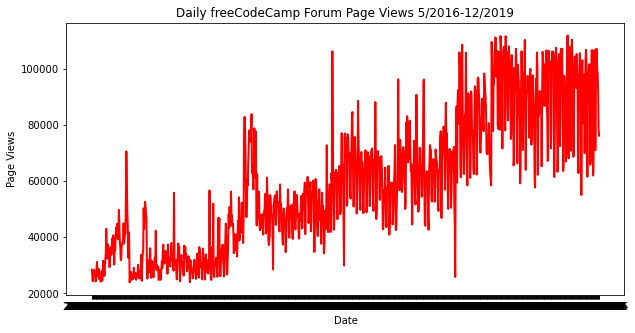

In [45]:
# Create a draw_line_plot function. The title should be "Daily freeCodeCamp Forum Page Views 5/2016-12/2019".
# The label on the x axis should be "Date" and the label on the y axis should be "Page Views"

fig, ax = plt.subplots(figsize=[10,5])
ax.plot(df.index, df['value'], color ='r', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

plt.show()

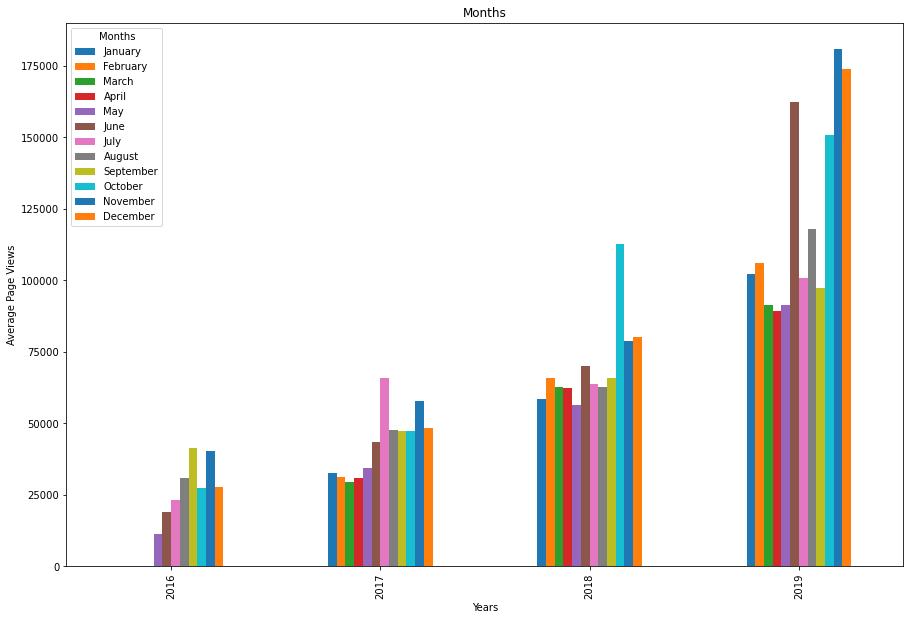

In [55]:
# Create a draw_bar_plot function that draws a bar chart. It should show average daily page views for each month
# grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the
# x axis should be "Years" and the label on the y axis should be "Average Page Views".

# Copy and modify data for monthly bar plot
# Extracting the year and month from the index (date) into separate columns
df["year"] = df.index.year
df["month"] = df.index.month

# group by year and month columns with their corresponding values, then find the average
df_bar = df.groupby(['year', 'month'])['value'].mean()

# group the months by year - unstack
df_bar = df_bar.unstack()

# Draw bar plot
fig = df_bar.plot(kind ="bar", legend = True, figsize = (15,10))

plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.title('Months')
plt.legend(fontsize = 10, title = "Months", labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

plt.show()

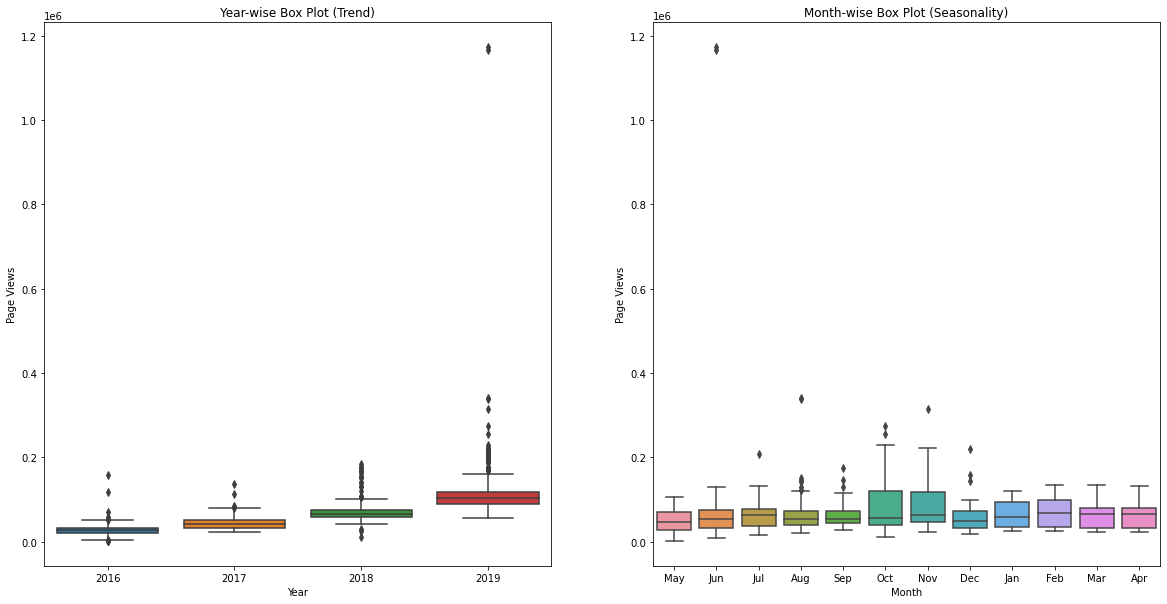

In [68]:
# Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots.
# These box plots should show how the values are distributed within a given year or month and how it compares over time.
# The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be
# "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled
# correctly. The boilerplate includes commands to prepare the data

df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Draw box plots (using Seaborn)
df_box['total_months'] = df_box['date'].dt.month
df_box = df_box.sort_values('total_months')

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_figwidth(20)
fig.set_figheight(10)

ax1 = sns.boxplot(x = df_box['year'], y = df_box['value'], ax=ax1)
ax1.set_title("Year-wise Box Plot (Trend)") 
ax1.set_xlabel('Year')
ax1.set_ylabel('Page Views')

ax2 = sns.boxplot(x=df_box["month"], y=df_box["value"], ax=ax2)
ax2.set_title("Month-wise Box Plot (Seasonality)")
ax2.set_xlabel('Month')
ax2.set_ylabel('Page Views')

plt.show()